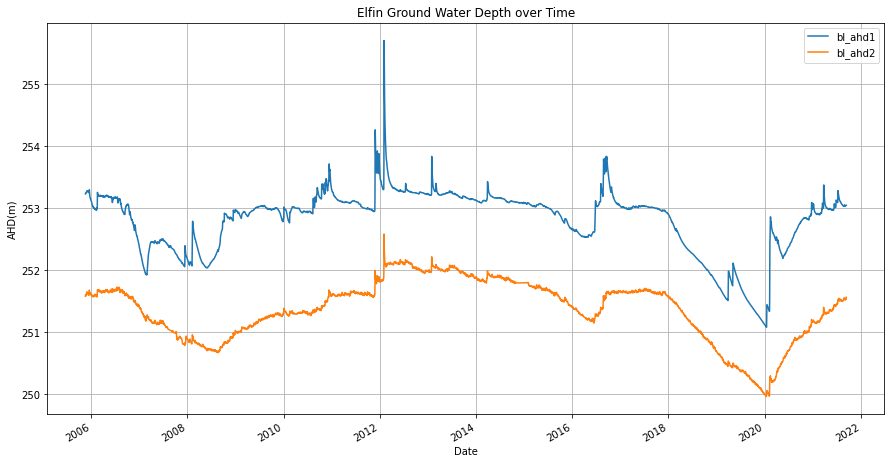

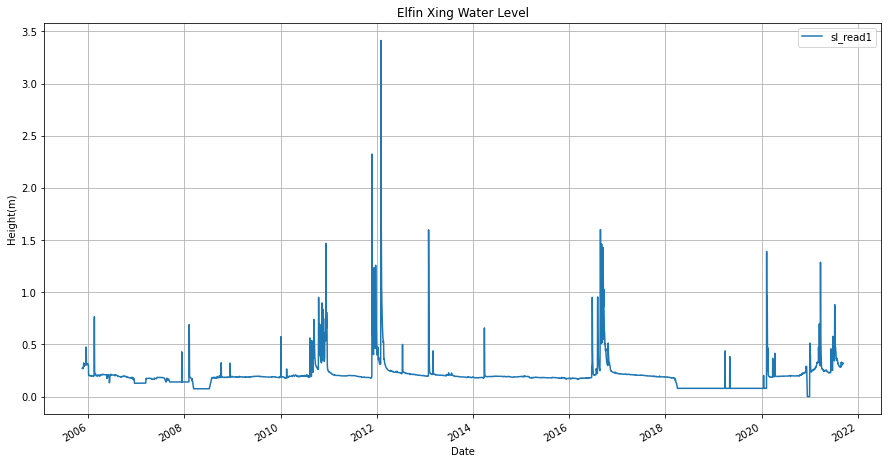

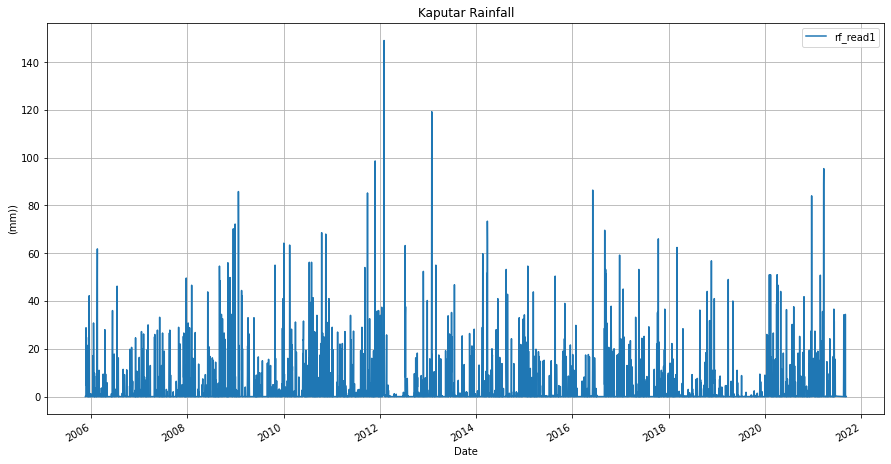

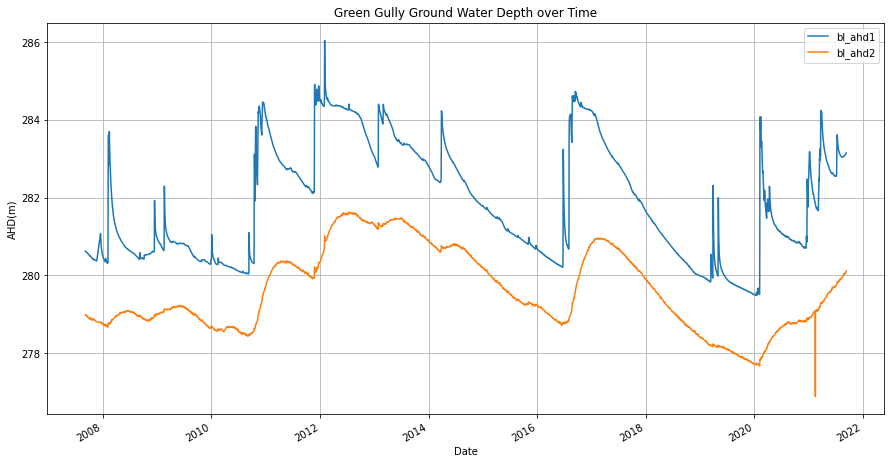

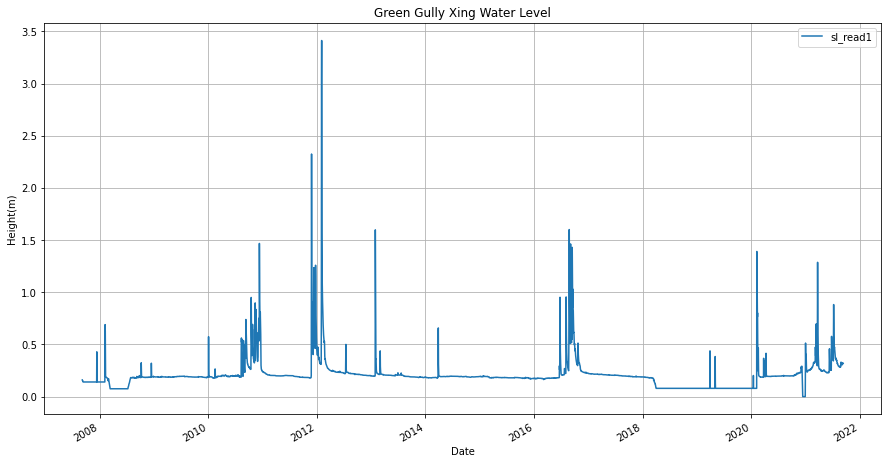

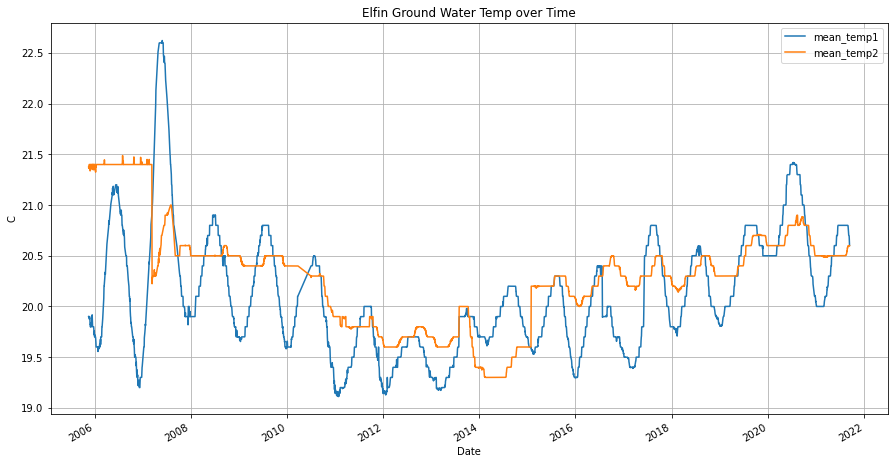

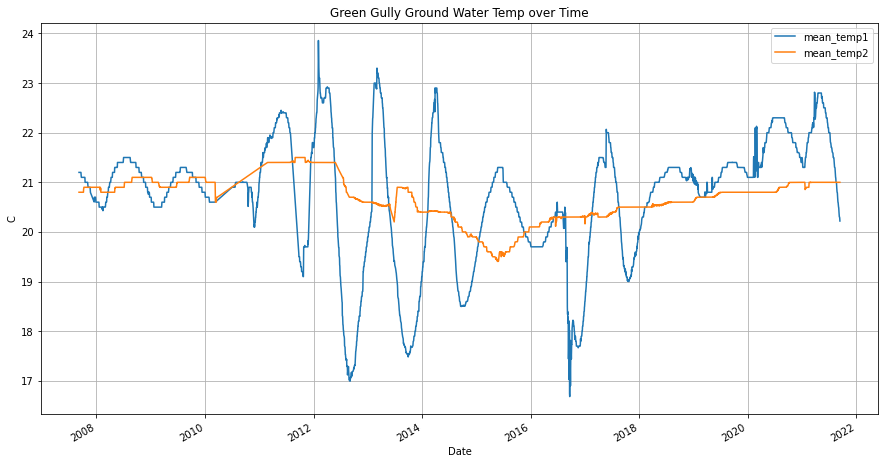

In [4]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def mysqlconnect(): 
    # To connect MySQL database 

  
    connection = pymysql.connect(
        # host='192.168.208.1',
        host='192.168.11.6',
        user='root', 
        password='water',
        database='waterdata',
        port=30000)
    
    
    try:
        with connection.cursor() as cursor:
                   
            sql2 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, `A`.`mean_temp` AS `mean_temp1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`, `B`.`mean_temp` AS `mean_temp2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                            
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967138.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "419051" AND `C`.`read_date` = `A`.`read_date` )
                        
                        WHERE  
                            `A`.`meter_no` = "GW967138.1.1" AND `B`.`bl_ahd` > 0
                        ''')
            
            
                   
            sql1 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, `A`.`mean_temp` AS `mean_temp1`,
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`, `B`.`mean_temp` AS `mean_temp2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                            
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "419051" AND `C`.`read_date` = `A`.`read_date` )
                        
                        WHERE  
                            `A`.`meter_no` = "GW967137.1.1"
                        ''')
            
            sql3 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, `A`.`mean_temp` AS `mean_temp1`,
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`, `B`.`mean_temp` AS `mean_temp2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                            `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "419051" AND `C`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `rainfall` `D` ON (`D`.`meter_no` = "054151-2" AND `D`.`read_date` = `A`.`read_date` )
                        WHERE  
                            `A`.`meter_no` = "GW967137.1.1"
                        ''')
            
        
        df1 = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        df2 = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        df3 = pd.read_sql_query(sql3, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        
        
        df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'])
        df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])
        df1['mean_temp1'] = pd.to_numeric(df1['mean_temp1'])
        df1['mean_temp2'] = pd.to_numeric(df1['mean_temp2'])
        df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])
        
        df2['bl_ahd1'] = pd.to_numeric(df2['bl_ahd1'])
        df2['bl_ahd2'] = pd.to_numeric(df2['bl_ahd2'])
        df2['mean_temp1'] = pd.to_numeric(df2['mean_temp1'])
        df2['mean_temp2'] = pd.to_numeric(df2['mean_temp2'])
        df2['sl_read1'] = pd.to_numeric(df2['sl_read1'])
        
        df3['bl_ahd1'] = pd.to_numeric(df3['bl_ahd1'])
        df3['bl_ahd2'] = pd.to_numeric(df3['bl_ahd2'])
        df3['mean_temp1'] = pd.to_numeric(df3['mean_temp1'])
        df3['mean_temp2'] = pd.to_numeric(df3['mean_temp2'])
        df3['sl_read1'] = pd.to_numeric(df3['sl_read1'])
        df3['rf_read1'] = pd.to_numeric(df3['rf_read1'])
        

                
        # df1.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Elfin Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
        # 
        # df2.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Green Gully Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
        # 
        # df1.plot(x='read_date', y='sl_read1',figsize=(15,7), grid=True, title='Elfin Xing Water Level', xlabel='Date',ylabel='Height(m)')
        # 
        # df3.plot(x='read_date', y=['rf_read1'],figsize=(15,7), grid=True, title='Kaputar Rainfall', xlabel='Date',ylabel='(mm))')
        # 
        
        fig1 = df1.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,8), grid=True, title='Elfin Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)').get_figure()
        plt.savefig('elfin_groundwater.jpg')
        
        fig2 = df1.plot(x='read_date', y='sl_read1',figsize=(15,8), grid=True, title='Elfin Xing Water Level', xlabel='Date',ylabel='Height(m)').get_figure()
        plt.savefig('elfin_surfacewater.jpg')
        
        fig3 = df3.plot(x='read_date', y=['rf_read1'],figsize=(15,8), grid=True, title='Kaputar Rainfall', xlabel='Date',ylabel='(mm))').get_figure()
        plt.savefig('mt_kaputar_rainfall.jpg')
        
        fig4 = df2.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,8), grid=True, title='Green Gully Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)').get_figure()
        plt.savefig('Green_Gully_groundwater.jpg')
        
        fig5 = df2.plot(x='read_date', y='sl_read1',figsize=(15,8), grid=True, title='Green Gully Xing Water Level', xlabel='Date',ylabel='Height(m)').get_figure()
        plt.savefig('Green_Gully_surfacewater.jpg')
        
        fig6 = df1.plot(x='read_date', y=['mean_temp1','mean_temp2'],figsize=(15,8), grid=True, title='Elfin Ground Water Temp over Time', xlabel='Date',ylabel='C').get_figure()
        plt.savefig('elfin_temp.jpg')
        
        fig7 = df2.plot(x='read_date', y=['mean_temp1','mean_temp2'],figsize=(15,8), grid=True, title='Green Gully Ground Water Temp over Time', xlabel='Date',ylabel='C').get_figure()
        plt.savefig('Green_Gully_temp.jpg')
        
        
        plt.show()
       
        
      
    except:
        print("Error: unable to convert the data")

    connection.close()
  
# Driver Code 
if __name__ == "__main__" : 
    mysqlconnect()
    
    
    
# Graph 1
# 
#     Elfin Blue line is bore number GW967137.1.1 which is screened so that it is measuring the alluvial aquifer
# 
#     Elfin Yellow line is bore number GW967137.2.2 which is screened so that it is measuring the deeper hardrock aquifer
# 
# Graph 2
# 
#     Green Gully Blue line is bore number GW967138.1.1 which is screened so that it is measuring the alluvial aquifer
# 
#     Green Gully Yellow line is bore number GW967138.2.2 which is screened so that it is measuring the deeper hardrock aquifer
# 
# Graph 3
# 
#     Elfin Crossing surface water gauge number 419051
# 
# Graph 4
# 
#     Kaputar Rainfall - gauge number 54151. 